In [78]:
import numpy as np 
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
covid_data = pd.read_csv('covid-19-county-level-data.csv')
mobility = pd.read_csv('us-mobility.csv')

In [79]:
covid_data = covid_data[covid_data.state == 'Massachusetts']
mobility = mobility[mobility.state == 'Massachusetts']



In [80]:
mobility['county'] = mobility.county.apply(lambda x: str(x).split()[0])
mobility = mobility.drop(['Unnamed: 0','state'], axis=1)
covid_data = covid_data.drop(['Unnamed: 0','fips','state'],axis=1)

In [81]:
df = pd.merge(covid_data, mobility,  how='left', left_on=['date','county'], right_on = ['date','county',])
df = df[df['county']!='Total']
df = df[df['county']!='Unknown']
df


,date,county,cases,deaths,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,2020-02-01,Suffolk,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-02,Suffolk,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-03,Suffolk,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-04,Suffolk,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-05,Suffolk,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2098,2020-07-28,Nantucket,34,1,NaN,NaN,NaN,NaN,NaN,NaN
2099,2020-07-28,Norfolk,10034,977,NaN,NaN,NaN,NaN,NaN,NaN
2100,2020-07-28,Plymouth,9018,706,NaN,NaN,NaN,NaN,NaN,NaN
2101,2020-07-28,Suffolk,20960,1052,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df=df.fillna(df.median(axis=0))

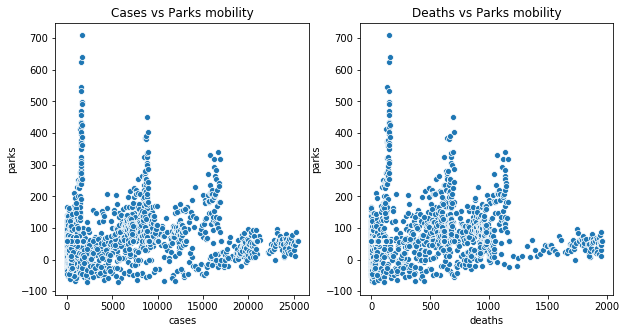

In [94]:
f, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(x="cases", y="parks", data=df, ax=ax[0])
ax[0].set_title('Cases vs Parks mobility')
sns.scatterplot(x="deaths", y="parks", data=df, ax=ax[1])
ax[1].set_title('Deaths vs Parks mobility')
plt.show()

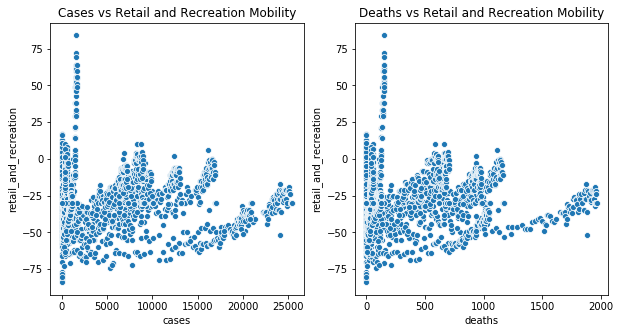

In [96]:
f, ax = plt.subplots(1,2 , figsize=(10,5))
sns.scatterplot(x='cases', y='retail_and_recreation', data=df, ax=ax[0])
ax[0].set_title('Cases vs Retail and Recreation Mobility')
sns.scatterplot(x='deaths', y='retail_and_recreation', data=df, ax=ax[1])
ax[1].set_title('Deaths vs Retail and Recreation Mobility')
plt.show()

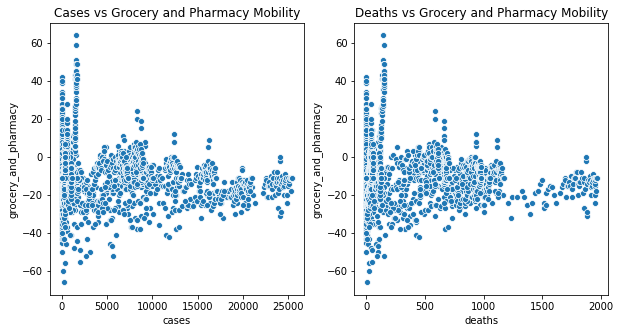

In [97]:
f, ax = plt.subplots(1,2 , figsize=(10,5))
sns.scatterplot(x='cases', y='grocery_and_pharmacy', data=df, ax=ax[0])
ax[0].set_title('Cases vs Grocery and Pharmacy Mobility')
sns.scatterplot(x='deaths', y='grocery_and_pharmacy', data=df, ax=ax[1])
ax[1].set_title('Deaths vs Grocery and Pharmacy Mobility')
plt.show()

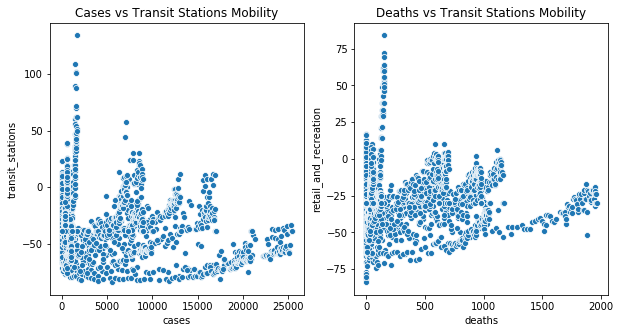

In [98]:
f, ax = plt.subplots(1,2 , figsize=(10,5))
sns.scatterplot(x='cases', y='transit_stations', data=df, ax=ax[0])
ax[0].set_title('Cases vs Transit Stations Mobility')
sns.scatterplot(x='deaths', y='retail_and_recreation', data=df, ax=ax[1])
ax[1].set_title('Deaths vs Transit Stations Mobility')
plt.show()

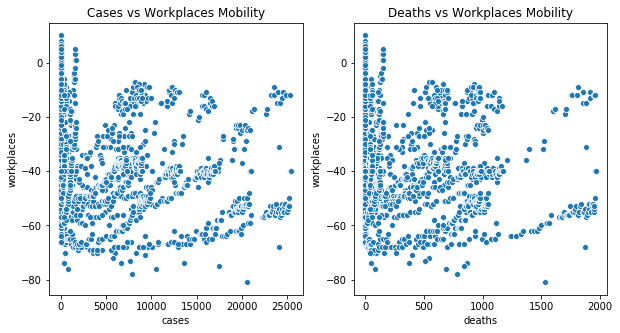

In [99]:
f, ax = plt.subplots(1,2 , figsize=(10,5))
sns.scatterplot(x='cases', y='workplaces', data=df, ax=ax[0])
ax[0].set_title('Cases vs Workplaces Mobility')
sns.scatterplot(x='deaths', y='workplaces', data=df, ax=ax[1])
ax[1].set_title('Deaths vs Workplaces Mobility')
plt.show()

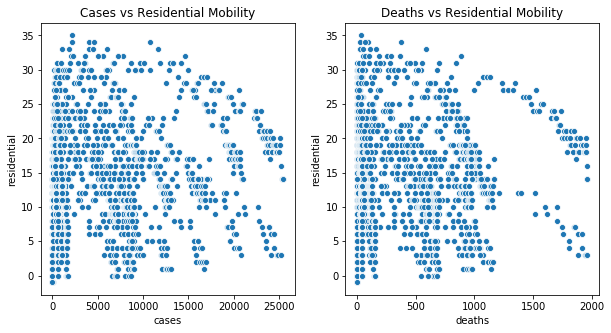

In [100]:
f, ax = plt.subplots(1,2 , figsize=(10,5))
sns.scatterplot(x='cases', y='residential', data=df, ax=ax[0])
ax[0].set_title('Cases vs Residential Mobility')
sns.scatterplot(x='deaths', y='residential', data=df, ax=ax[1])
ax[1].set_title('Deaths vs Residential Mobility')
plt.show()

In [102]:
import plotly.express as px
fig = px.line(df, x='date', y='parks', title='Mobility of Parks')
fig.show()

In [103]:
import plotly.express as px
fig = px.line(df, x='date', y='retail_and_recreation', title='Retail and Recretion Mobility')
fig.show()

In [104]:
import plotly.express as px
fig = px.line(df, x='date', y='grocery_and_pharmacy', title='Grocery and Pharmacy Mobility')
fig.show()

In [105]:
import plotly.express as px
fig = px.line(df, x='date', y='transit_stations', title='Transit Stations Mobility')
fig.show()

In [106]:
import plotly.express as px
fig = px.line(df, x='date', y='residential', title='Residential Mobility')
fig.show()